In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt


''''I used copilot to help me comment and structure my code.'''

"'I used copilot to help me comment and structure my code."

a) Compute the relative number of photons that can ionize $H^0$ and $C^0$, Q($C^0$)/Q($H^0$), from this B0 star. Assume that the star's ionizing spectrum is a blackbody in the Wein tail. Further, assume that photons with hv > 13.6eV ionize only H and photons with 11.8 < hv < 13.6 ionize only C.

In [2]:
# Constants
h = const.h.value                                  # Planck's constant in J·s
c = const.c.value                                  # Speed of light in m/s
k_B = const.k_B.value                              # Boltzmann constant in J/K
T_eff = 31500                                      # Effective temperature of the star in Kelvin
n_c_n_H_ratio = 2 * 10**(-4)                       # Ratio of carbon to hydrogen atoms
recomb_coeff_C = 4.66 * 10**(-13) * (u.cm**3/u.s)  # Recombination coefficient for carbon in cm^3/s

# Energy bounds in eV (converted to Joules)
E_H0 = 13.6 * u.eV.to('J')                  # Ionization energy of hydrogen in Joules
E_C0_low = 11.18 * u.eV.to('J')              # Lower bound for carbon ionization in Joules
E_C0_high = 13.6 * u.eV.to('J')             # Upper bound for carbon ionization in Joules

# Convert energy to frequency (v = E/h)
v_H0 = E_H0 / h             # Frequency corresponding to 13.6 eV
v_C0_low = E_C0_low / h     # Frequency corresponding to 11.8 eV
v_C0_high = E_C0_high / h   # Frequency corresponding to 13.6 eV


In [3]:
# Wein tail approximation for the blackbody spectrum (normalized version)
def wein_tail(v, T):
    """Wein tail approximation for the blackbody spectrum."""
    return ( 2 * h * v**3 / c**2 ) * np.exp(-h * v / (k_B * T))

# Photon flux, proportional to the number of photons at a given frequency
def photon_flux(v, T):
    """Returns the photon flux (number of photons per unit frequency)."""
    return wein_tail(v, T) / (h * v)

# Set a reasonable upper limit for integration
v_upper_limit = 100* v_H0  # Change this factor as needed

# Integrating for hydrogen (hv > 13.6 eV) with an upper limit
Q_H0, error_H0 = integrate.quad(photon_flux, v_H0, v_upper_limit, args=(T_eff,))
print(f'Integral for hydrogen (Q_H0): {Q_H0:.2e}, Error estimate: {error_H0:.2e}')

# Integrating for carbon (11.8 < hv < 13.6 eV)
Q_C0, error_C0 = integrate.quad(photon_flux, v_C0_low, v_C0_high, args=(T_eff,))
print(f'Integral for carbon (Q_C0): {Q_C0:.2e}, Error estimate: {error_C0:.2e}')

Integral for hydrogen (Q_H0): 1.56e+27, Error estimate: 2.21e+18
Integral for carbon (Q_C0): 1.23e+27, Error estimate: 1.36e+13


In [4]:
# Computing the relative number of photons
ratio = Q_C0 / Q_H0
print(f'The relative number of photons Q(C^0)/Q(H^0) is {ratio:.2}')

The relative number of photons Q(C^0)/Q(H^0) is 0.79


b) Estimate the relative radii of the HII and CII Stromgren spheres around this star. Assume that in the H+ ionization zone all the electrons come from H0, and in the C+ ionization zone all the electrons come from C0. 

In [5]:
# more constants
T_region = 8000                                    # Temperature of the region in Kelvin H2 Region (From Textbook)
n_c_n_H_ratio = 2 * 10**(-4)                       # Ratio of carbon to hydrogen atoms
recomb_coeff_C = 4.66*10**(-13) * (u.cm**3 / u.s)  # Recombination coefficient for carbon in cm^3/s
recomb_coeff_H = 3.1 * 10**(-13) * ( T_region / 8000 )**(-0.82) * (u.cm**3/u.s)   # Recombination coefficient for hydrogen in cm^3/s


In [6]:
def stromgren_radius_ratio(Q_H0, recomb_coeff_H, Q_C0, recomb_coeff_C, n_c_n_H_ratio):
    """Returns the Strömgren radius."""
    R_H = ( 3 * Q_H0 / (4 * np.pi * recomb_coeff_H) )**(1/3)
    R_C = ( 3 * Q_C0 / (4 * np.pi * recomb_coeff_C) )**(1/3)
    multiplier = n_c_n_H_ratio**(-2/3)
    return R_C / R_H * multiplier

stromgren_radius_ratio = stromgren_radius_ratio(Q_H0, recomb_coeff_H, Q_C0, recomb_coeff_C, n_c_n_H_ratio)
print(f'The Strömgren radius ratio is: R_C/R_H = {stromgren_radius_ratio:.2f}')

The Strömgren radius ratio is: R_C/R_H = 235.67


c) Assume this B0 star and its ionized C region are in the WNM with n_H = 1 cm^-3 and that the rate of productopm of hydrogen-ionizing photons is Q0 = 3.55*10^48 s^-1. What is the radius of the star's carbon Stromgren sphere assuming all its free electrons come from ionizing C0?

In [7]:
n_H = 1 * u.cm**(-3)             # Hydrogen number density in cm^-3
Q0 = 3.55 * 10**48 * (1/u.s)     # Ionizing photons per second
Q_C_new = Q0 * 0.79            # ratio from part a. 
n_C = 2*10**(-4) / u.cm**3       # Number density of carbon in cm^-3


R_C = ((( 3 * Q_C_new ) / (4 * np.pi * recomb_coeff_C * n_C**2))**(1/3)).to(u.kpc)
print(f'The Strömgren radius for carbon is: {R_C:.2f}')

The Strömgren radius for carbon is: 10.69 kpc


d) The actual ionization state of the WNM is higher than you assumed above. Repeat your calculation in part (c) for x ~ 10^(-2) (i.e. n_e~0.01n_H)

In [8]:
x = 1e-2       # Ionization fraction

n_e = x * n_H  # Electron number density

R_C = ((3 * Q0) / (4 * np.pi * recomb_coeff_C * n_C * n_e))**(1/3)
R_C = R_C.to(u.kpc)  # Convert the result to parsecs

print(f'The Strömgren radius for carbon is: {R_C:.2f}')

The Strömgren radius for carbon is: 3.14 kpc


e) What are the implications of the calculations above for the ionization state of carbon in the WNM? Think about the general size and distance scales for the Milky Way. What is the thickness of the HI disk? If there are N star forming regions distributed throughout the MW, how are they spaced in distance?

In the WNM, carbon will have a larger Stromgren sphere then hydrogen by a factor of about 232 times larger. This makes sense because carbon is easier to ionize since its outter electron requires less energy to get kicked out, as seen by the limits of integration provided. 
In the MW, the thickness of the thin disk is 0.2kpc and the thick disk is 2.6kpc. Taking the ration of Stromgren radius from part b and calculating the one of Hydrogen using the value of Carbon from part d is 0.01kpc, meaning the diameter of the Stromgren sphere is 0.02kpc. Therefore, approximately 10 - 130 star forming regions fit in the thickness range of 0.2kpc to 2.6kpc. 

In [9]:
R_H_in_kpc = 3.14 / 235.67
print(f'The Strömgren radius for hydrogen using parts b and d is: {R_H_in_kpc:.2f} kpc')

The Strömgren radius for hydrogen using parts b and d is: 0.01 kpc


2) The intensity of Hα emission in the diffuse warm ionized medium provides an estimate of the emission measure along the line of sight.

    (a) Use the values of Table 4.4 (attached to Canvas assignment) Download Table 4.4 (attached to Canvas assignment)to compute a relation between the emission measure EM (in units of cm−6 pc) and the observed intensity of Hα – that is, I(Hα) in units of Rayleighs (R), where 1R = 106/(4π) photons cm−2 s−1 ster−1.

The curve fit for the recombination coefficient is: [-0.83333858 -9.25808181]


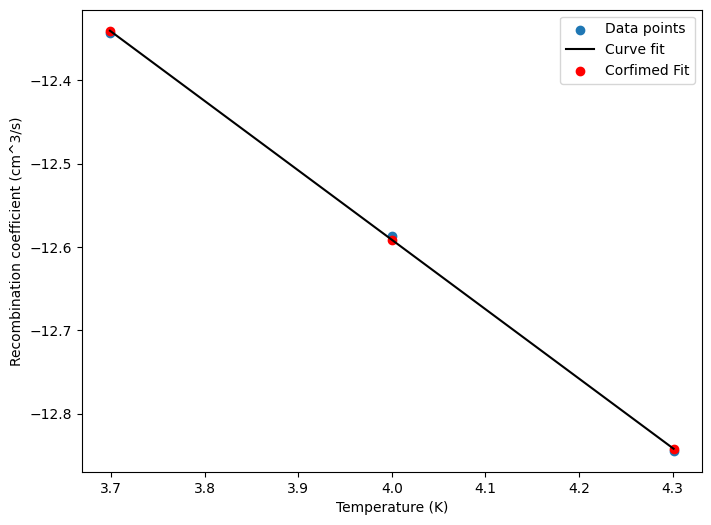

In [10]:
T = np.log10([5000, 10000, 20000]) # Temperatures in Kelvin
# below I call the list Alpha_A, but I am actually using the alpha B values from the table, because that is similar to what was shown in class.
alpha_A = np.log10([4.54e-13, 2.59e-13, 1.43e-13]) # Recombination coefficients in cm^3/s 
T_og = np.array([5000, 10000, 20000])

# curve fitting between temperature and recombination coefficient
def curve_fit(T, alpha_A):
    """Returns the curve fit for the recombination coefficient."""
    return np.polyfit(T, alpha_A, 1)

# Fit the curve
fit = curve_fit(T, alpha_A)
print(f"The curve fit for the recombination coefficient is: {fit}")

# plot 
plt.figure(figsize=(8, 6))
plt.scatter(T, alpha_A, label='Data points')
plt.plot(T, np.polyval(fit, T), color='black', label='Curve fit')
plt.scatter(np.log10(T_og), np.log10((T_og**fit[0])*10**(fit[1])), color='red', label='Corfimed Fit')

plt.xlabel('Temperature (K)')
plt.ylabel('Recombination coefficient (cm^3/s)')
plt.legend()
plt.show()


In [11]:
prefactor = ( (10**(4 * 0.83)) * (10**6) * 10 **(9.25) / ((1*u.pc).to(u.cm)) ).value
print(f'The prefactor is: {prefactor:.2f}')

The prefactor is: 1.20


b) A particular line of sight has an I(Hα) = 6R. What is the corresponding EM? If the corresponding length is about 2 kpc, what is the resulting estimate for ne?



In [12]:
R = 10**6 / (4*np.pi)
I = 6 * R   
T = 8000 # The temperature of the WNM 

EM = 1.2 * (T/10**4)**(0.83) * (I / R)
print(f'The EM is: {EM:.2e}')  # emission measure 

The EM is: 5.98e+00


In [13]:
EM_new = EM * (u.cm**(-6)*u.pc)
L = 2*u.kpc
n_e_estimate = np.sqrt( EM_new / L ).to(u.cm**(-3))
print(f'The electron density is: {n_e_estimate:.2f}')  # electron density

The electron density is: 0.05 1 / cm3


(c) The WIM is not uniform. Take a simple model in which only a fraction φ along the line of sight is filled with electrons. Pulsar dispersion measurements indicate a typical value near the Sun of neφ = 0.025 cm−3. Use this value in combination with the results from part (b) to solve for the filling factor φ and the mean electron density. How does this density estimate compare with typical values of the WNM?

In [14]:
phi = 0.025 / n_e_estimate
print(f'The ionization fraction is: {phi.value:.2f}')  # ionization fraction
print('Slides 2 page 3 has value of 0.4 for WNM, which is very close to the value I calculated.')  # comparison with the textbook value

The ionization fraction is: 0.46
Slides 2 page 3 has value of 0.4 for WNM, which is very close to the value I calculated.


3) This question will explore (highly idealized) which stars emit ionizing photons from a stellar population and how long this emission will last after the population forms.

a) Write a function that integrates a stellar spectrum with a pure Planck function emission (wild approximation) of temperature 
 and radius 
 to determine the number of hydrogen ionizing photons emitted by the star per second.

In [15]:
# Constants
h = const.h.cgs.value                  # Planck's constant in erg·s
c = const.c.cgs.value                  # Speed of light in cm/s
k_B = const.k_B.cgs.value              # Boltzmann constant in erg/K
E_H0 = 13.6 * u.eV.to('erg')           # Ionization energy of hydrogen in erg

# Planck function for the blackbody spectrum
def planck_flux(v, T):
    return (2 * h * v**3 / c**2) / (np.exp(h * v / (k_B * T)) - 1)

# Photon flux (number of photons per second per frequency)
def photon_flux(v, T):
    with np.errstate(over='ignore'):
       return planck_flux(v, T) / (h * v)

# Function to calculate the number of ionizing photons per second
def hydrogen_ionizing_photons(T, R_star):
    v_H0 = E_H0 / h  # frequency of ionization energy of H
    try:
        Q_H0, error_H0 = integrate.quad(lambda v: photon_flux(v, T) * 4 * np.pi * R_star**2, v_H0, 8*v_H0) #if you integrate to inf, function diverges and get RuntimeWarning
                                                                                                           # Need to use try and except 
    except RuntimeWarning as e:
        print(f"Integration stopped due to: {e}")
        return None
    return Q_H0


b) Use this function and the main sequence mass-luminosity and mass-radius relations given in class to calculate the number of ionizing photons emitted per second (also per unit mass) from a simple stellar population of main sequence stars immediately after forming with a Salpeter IMG.

radius source : [https://jila.colorado.edu/~ajsh/courses/astr1120_03/text/chapter5/l5S1.htm#:~:text=With%20this%20equation%20and%20the,mass%3A%20R%20%3D%20M0.8.]

In [16]:
# Salpeter IMF relation phi_m = A * m**(-2.35) where phi_m is the initial mass distribution of stars at their time of birth.

# IMF function (Salpeter IMF)
def salpeter_imf(mass):
    return mass**(-2.35) # there is a constant in front that is disregarded

# Function to calculate the total ionizing photons from the population
def total_ionizing_photons(T_func, R_func, mass_min=0.1, mass_max=100):  # mass_min = 0.1, mass_max = 100
    """
    Integrate the number of hydrogen-ionizing photons over the stellar population.
    
    Parameters:
    T_func : function to calculate temperature for a given mass
    R_func : function to calculate radius for a given mass
    mass_min : minimum mass of the stellar population
    mass_max : maximum mass of the stellar population
    
    Returns:
    Total number of ionizing photons per second
    """
    # Photon emission rate integrand
    def integrand(mass):
        R_star = R_func(mass)
        T_star = T_func(mass)
        
        # Calculate the number of ionizing photons for this mass star
        Q_H0 = hydrogen_ionizing_photons(T_star, R_star)
        
        # Multiply by the IMF to weight by the number of stars of this mass
        return Q_H0 * salpeter_imf(mass) #units of photons/s
    
    # Integrate over the entire mass range
    total_photons, error = integrate.quad(integrand, mass_min, mass_max)
    
    return total_photons

# Example: Assuming blackbody emission and using simplified relations for radius and temperature
def temperature(mass):
    """Returns the temperature of a star (in K) as a function of mass (M/M_sun)."""
    if mass < 0.43:
        return 5772 * (0.23)**0.25 * (mass)**(0.225)
    elif 0.43 <= mass < 2:
        return  5772 * (mass)**(0.65)
    elif 2 <= mass < 55:
        return 5772 * (1.4)**0.25 * (mass)**(0.525)
    else:
        return 5772 * (32000)**0.25 * (mass)**(-.01)

    # return 5772 * (mass)  # temperature of sun. Luminosity is proportional to mass^4 which is proportional to T^4

def radius(mass):
    """Returns the radius of a star (in cm) as a function of mass (M/M_sun)."""
    return 6.957e10 * (mass)**0.7  # Scaling relation, multiplied by radius of sun in cm because I'm dealing with ergs


########## BELOW IS AN EXAMPLE OF HOW TO USE THE FUNCTION total_ionizing_photons ########## 

# Calculate the total number of hydrogen-ionizing photons
total_photons = total_ionizing_photons(temperature, radius)
print(f"Total number of hydrogen-ionizing photons per second: {total_photons:.2e} photons/s")


Total number of hydrogen-ionizing photons per second: 5.51e+47 photons/s


c) Calculate the mass threshold, M_ionize , such that stars of mass M > M_ionize are responsible for 90% of the ionizing photons from the zero-age simple stellar population. Use this to estimate the timescale over which a newly formed star cluster will emit a significant number of ionizing photons.

The lifetime to mass ratio is from: [https://astronomy.swin.edu.au/cosmos/m/main+sequence+lifetime#:~:text=Since%20stars%20spend%20roughly%2090%%20of%20their,lifetime]

In [17]:
# Use IMF to calculate the number of stars in a given mass range
# Define the mass range
mass_range = np.geomspace(0.1, 100, 500)

# Use IMF to calculate the number of stars in a given mass range
def number_of_stars_in_mass_range(mass_range, imf_func):
    """Calculate the number of stars in a given mass range using the IMF."""
    return np.array([imf_func(mass) for mass in mass_range])

# Calculate the number of stars
num_stars = number_of_stars_in_mass_range(mass_range, salpeter_imf)

# normalize number of stars and only use the higher integer values
num_stars_normalized = num_stars / np.mean(num_stars)
num_stars_normalized_new = ( np.ceil(num_stars_normalized) ).astype(int)
num_stars_normalized_new , mass_range


print('In this code, my goal was to try to generate a population of stars based on the Salpeter IMF.')
print('Before, I was using a uniform distribution of stars, but the value that I was getting for the mass threshold for 0.9 was too large.')
print('The previous uniform distribution was 0.1 to 100 with a step of 0.1. This one has more stars in the lower mass range, which is more realistic.')

In this code, my goal was to try to generate a population of stars based on the Salpeter IMF.
Before, I was using a uniform distribution of stars, but the value that I was getting for the mass threshold for 0.9 was too large.
The previous uniform distribution was 0.1 to 100 with a step of 0.1. This one has more stars in the lower mass range, which is more realistic.


In [18]:
# # Function to calculate the cumulative ionizing photons
def cumulative_ionizing_photons(mass, T_func, R_func):
    R_star = R_func(mass)
    T_star = T_func(mass)
    Q_H0 = hydrogen_ionizing_photons(T_star, R_star)
    return Q_H0 * salpeter_imf(mass)

# Total number of ionizing photons
total_photons = 5.51e47


def find_mass_threshold_with_star_counts(T_func, R_func, total_photons, mass_range, num_stars_normalized_new, threshold=0.9):
    cumulative_photons = 0
    mass_index = 0  # Start from the minimum mass bin
    
    # Iterate over the mass range and accumulate ionizing photons
    for mass, num_stars in zip(mass_range, num_stars_normalized_new):
        # Calculate the photons for a single star of this mass
        R_star = R_func(mass)
        T_star = T_func(mass)
        Q_H0 = hydrogen_ionizing_photons(T_star, R_star)
        
        # Multiply by the number of stars in this mass bin
        cumulative_photons += Q_H0 * num_stars
        
        # Check if we've reached the threshold
        if cumulative_photons / total_photons >= threshold:
            return mass  # Return the mass corresponding to 90% of the ionizing photons

M_ionize = find_mass_threshold_with_star_counts(temperature, radius, total_photons, mass_range, num_stars_normalized_new)
print(f"The mass threshold M_ionize is: {M_ionize:.2f} M_sun")

# Assuming the lifetime of stars is inversely proportional to their mass
def star_lifetime(mass):
    return (10**10) * (mass)**(-2.5) # in years THIS IS USING THE RATIO FROM THE SOURCE SPECIFIED ABOVE

timescale = star_lifetime(M_ionize)
print(f"The timescale over which the star cluster will emit significant ionizing photons is: {timescale/(10**6):.2f} Myr")
#according to googles "few million years response, I think this value should be correct."



The mass threshold M_ionize is: 12.36 M_sun
The timescale over which the star cluster will emit significant ionizing photons is: 18.60 Myr
